In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

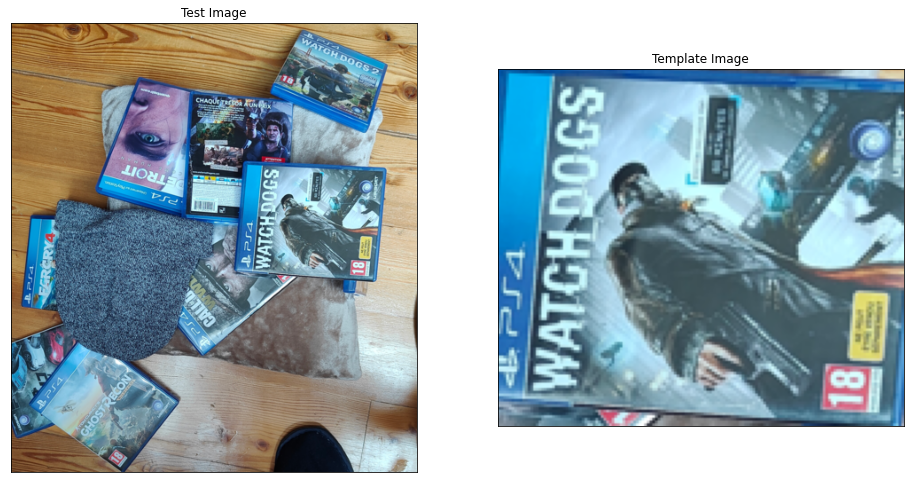

In [5]:
img_color = cv.imread("testImage.png")

img_color_reversed = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
img_template = img_color_reversed[159:291, 263:413]

plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(img_color_reversed)
plt.title("Test Image"); plt.xticks([]); plt.yticks([]);

plt.subplot(1,2,2)
plt.imshow(img_template)
plt.title("Template Image"); plt.xticks([]); plt.yticks([]);
img_template_reversed = cv.cvtColor(img_template, cv.COLOR_BGR2RGB)
cv.imwrite("template.png", img_template_reversed)
plt.show()

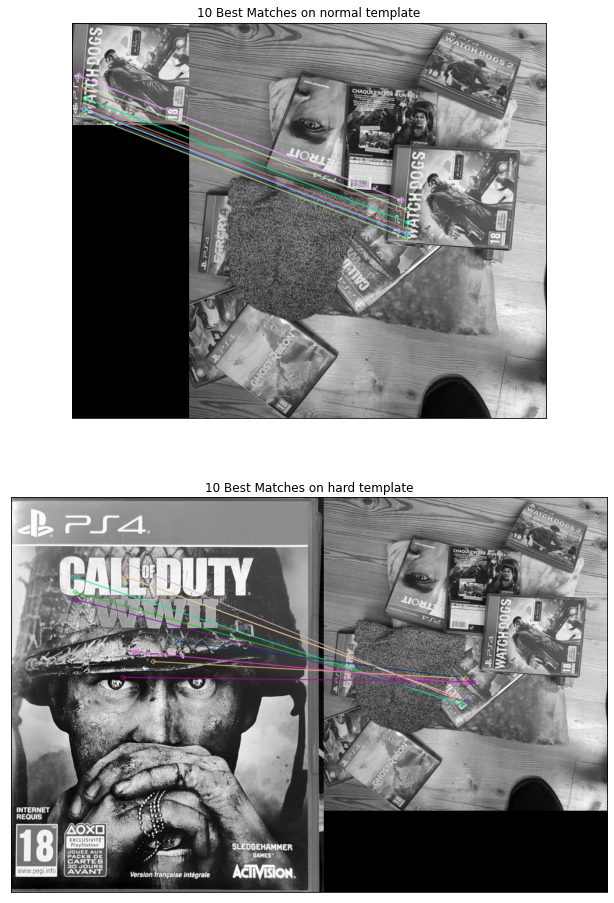

In [6]:
img_query = cv.imread('template.png', cv.IMREAD_GRAYSCALE)
img_query_hard = cv.imread('templateHarderMatch.jpg', cv.IMREAD_GRAYSCALE)
img_train = cv.imread('testImage.png', cv.IMREAD_GRAYSCALE)

sift = cv.SIFT_create()
kp_query, des_query = sift.detectAndCompute(img_query, None)
kp_query_hard, des_query_hard = sift.detectAndCompute(img_query_hard, None)
kp_train, des_train = sift.detectAndCompute(img_train, None)

bf = cv.BFMatcher()
matches = bf.match(des_query, des_train)
matches_hard = bf.match(des_query_hard, des_train)

sorted_matches = sorted(matches, key = lambda x:x.distance)
sorted_matches_hard = sorted(matches_hard, key = lambda x:x.distance)

img_matches = cv.drawMatches(img_query, kp_query, img_train, kp_train, sorted_matches[:10], None,
                            flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches_hard = cv.drawMatches(img_query_hard, kp_query_hard, img_train, kp_train, sorted_matches_hard[:10], None,
                            flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(12,16))
plt.subplot(211), plt.imshow(img_matches), plt.title('10 Best Matches on normal template'), plt.xticks([]), plt.yticks([])
plt.subplot(212), plt.imshow(img_matches_hard), plt.title('10 Best Matches on hard template'), plt.xticks([]), plt.yticks([])

plt.show()